In [23]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
rc('text', usetex=True)

In [24]:
def savepdf_tex(fig, name, **kwargs):
    import subprocess, os
    fig.savefig("temp.svg", format="svg", **kwargs)
    incmd = ["inkscape", "temp.svg", "--export-pdf={}.pdf".format(name),
             "--export-latex"] #"--export-ignore-filters",
    subprocess.check_output(incmd)
    os.remove("temp.svg")

In [25]:
def pd_read_dump(filepath):
    df = pd.read_csv(
        filepath, 
        sep="    ", comment="#",
        names = ["Particle ID", "Particle type", "Smoothing length", "Density", "Pressure", "Particle acceleration", "Particle velocity", "Particle position"],
        engine="python"
    )
    return df


(inkscape:9209): Gtk-WARNING **: 16:47:18.323: Theme parsing error: gtk-contained-dark.css:2871:228: Missing closing bracket for :not()


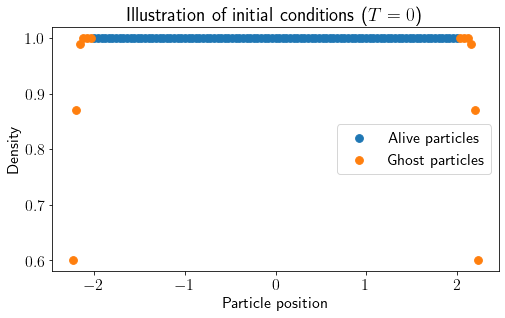

In [26]:
# Plot initial conditions

df_0 = pd_read_dump("../dumps/0.txt")

n_part = len(df_0)

df_alive = df_0[df_0["Particle type"] == "Alive"]
df_ghost = df_0[df_0["Particle type"] == "Ghost"]

# Initial condition plot showing off ghost particles
plt.figure(figsize=(8, 4.5))
plt.rc("font", size=16)

plt.scatter(df_alive["Particle position"], df_alive["Density"], label="Alive particles", s=60)
plt.scatter(df_ghost["Particle position"], df_ghost["Density"], label="Ghost particles", s=60)

plt.xlabel("Particle position")
plt.ylabel("Density")
plt.title("Illustration of initial conditions ($T=0$)")

plt.legend()
savepdf_tex(plt.gcf(), "ghost")


(inkscape:9232): Gtk-WARNING **: 16:47:18.707: Theme parsing error: gtk-contained-dark.css:2871:228: Missing closing bracket for :not()


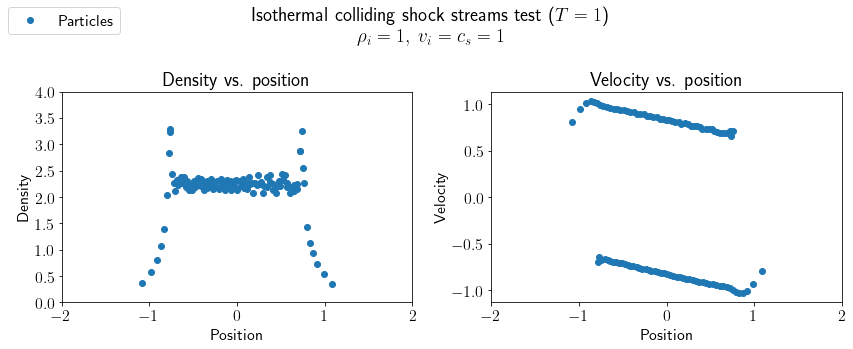

In [27]:
# Density plot at t = 1 for isothermal shock test
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df_1 = pd_read_dump(f"../dumps/200.txt")

ax[0].scatter(df_1["Particle position"], df_1["Density"], label="Particles", zorder=100)
#fig.set_title("T = 1 isothermal colliding streams / h = 0.3, T_step = 0.005")
ax[0].set_xlabel("Position")
ax[0].set_ylabel("Density")
ax[0].set_xlim(-2, 2)
ax[0].set_title("Density vs. position")
ax[0].set_ylim(00, 4)
ax[0].set_yticks(np.linspace(0, 4, 9))

ax[1].scatter(df_1["Particle position"], df_1["Particle velocity"])
ax[1].set_xlabel("Position")
ax[1].set_ylabel("Velocity")
ax[1].set_xlim(-2, 2)
ax[1].set_title("Velocity vs. position")

fig.suptitle("Isothermal colliding shock streams test ($T=1$)\n$\\rho_i = 1,\;v_i = c_s = 1$")

fig.legend(loc='upper left')
plt.tight_layout()

savepdf_tex(plt.gcf(), "isothermal")



(inkscape:9252): Gtk-WARNING **: 16:47:19.125: Theme parsing error: gtk-contained-dark.css:2871:228: Missing closing bracket for :not()


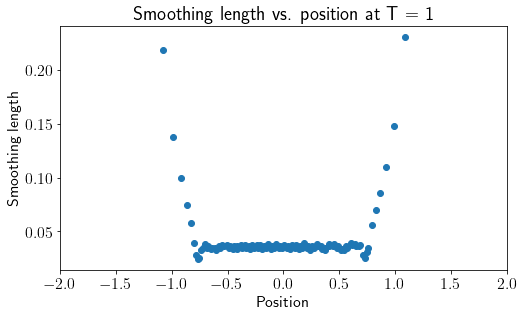

In [28]:
# Variable smoothing length plot
plt.figure(figsize=(8, 4.5))
df_1 = pd_read_dump(f"../dumps/200.txt")

plt.scatter(df_1["Particle position"], df_1["Smoothing length"])
plt.xlabel("Position")
plt.ylabel("Smoothing length")
plt.xlim(-2, 2)
plt.title("Smoothing length vs. position at T = 1")
savepdf_tex(plt.gcf(), "h_pos.pdf")


(inkscape:12564): Gtk-WARNING **: 17:37:04.348: Theme parsing error: gtk-contained-dark.css:2871:228: Missing closing bracket for :not()


,v1,rho,p,v_calc
0,0.805,0.366,0.366,2.242236
1,0.947,0.581,0.581,2.055966
2,1.010,0.804,0.804,1.990099
3,1.031,1.073,1.073,1.969932
4,1.027,1.391,1.391,1.973710
...,...,...,...,...
96,-1.028,1.135,1.135,1.972763
97,-1.030,0.935,0.935,1.970874
98,-1.006,0.728,0.728,1.994036
99,-0.938,0.539,0.539,2.066098


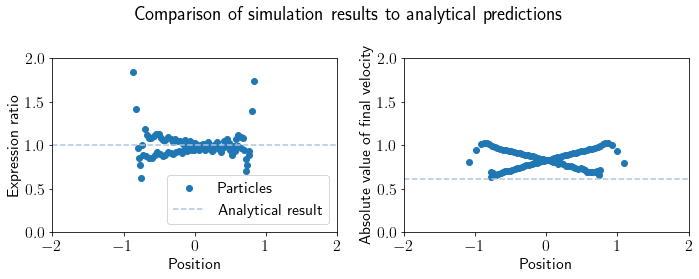

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df_0_ng = df_0[df_0["Particle type"] == "Alive"]
df_1_ng = df_1[df_1["Particle type"] == "Alive"]

v1 = df_1_ng["Particle velocity"]
rho = df_1_ng["Density"] / df_0_ng["Density"]
p = df_1_ng["Pressure"] / df_0_ng["Pressure"]
v_calc = 1 + df_0_ng["Particle velocity"] / df_1_ng["Particle velocity"]

v1_an = 0.5*(-1 + np.sqrt(1+4))

df_check = pd.DataFrame({"v1": v1, "rho": rho, "p": p, "v_calc": v_calc})

ax[0].scatter(df_1_ng["Particle position"], df_check["v_calc"] / df_check["rho"], label="Particles")
ax[0].plot([-2, 2], [1, 1], color="lightsteelblue", label="Analytical result", linestyle='dashed')
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(0, 2)
ax[0].set_xlabel(r"Position")
ax[0].set_ylabel(r"Expression ratio")
ax[0].legend()

ax[1].scatter(df_1_ng["Particle position"], np.abs(df_check["v1"]))
ax[1].set_xlim(-2, 2)
ax[1].set_xlabel(r"Position")
ax[1].set_ylabel("Absolute value of final velocity")
ax[1].axhline(y=v1_an, color='lightsteelblue', linestyle='dashed')
ax[1].set_ylim(0, 2)

fig.suptitle("Comparison of simulation results to analytical predictions")
fig.tight_layout()

savepdf_tex(fig, "analytical")

df_check.to_csv("analytical1.csv", index=False)

display(df_check)
